In [97]:
import sys
notebook_path = sys.path.append(r'e:\Data science\Titanic dataset\notebooks')

# Importing main libraries
from auto_imports import *
model_results_imports()
from sklearn.preprocessing import TargetEncoder , StandardScaler , RobustScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score  # StratifiedKFold is already available in the notebook

### Preparing the data

In [98]:
#Loading dataset
logistic_df = pd.read_csv('E:\Data science\Titanic dataset\data\Processed data\Data Analysis\processed_data.csv')
logistic_df.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ind,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket
0,1,0.0,3,male,22.0,1,0,7.2500,S,train,23-25-27,C,Mr,Braund,A/5,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C,train,85,C,Mrs,Cumings,PC,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,S,train,23-25-27,C,Miss,Heikkinen,STON/O2,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,S,train,123,C,Mrs,Futrelle,Non-special,0,0
4,5,0.0,3,male,35.0,0,0,8.0500,S,train,23-25-27,C,Mr,Allen,Non-special,0,0


In [99]:
logistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1280 non-null   int64  
 1   Survived             871 non-null    float64
 2   Pclass               1280 non-null   int64  
 3   Sex                  1280 non-null   object 
 4   Age                  1280 non-null   float64
 5   SibSp                1280 non-null   int64  
 6   Parch                1280 non-null   int64  
 7   Fare                 1280 non-null   float64
 8   Embarked             1280 non-null   object 
 9   ind                  1280 non-null   object 
 10  cell_number          1280 non-null   object 
 11  Cabin_letter         1280 non-null   object 
 12  Title                1280 non-null   object 
 13  FamilyName           1280 non-null   object 
 14  Special Agent/route  1280 non-null   object 
 15  TicketBatch          1280 non-null   i

In [100]:
# Splitting the dataset to train_logistic_df and predict_df
train_logistic_df = logistic_df.query('`ind` == "train"').drop(['ind' , 'PassengerId'] , axis=1)
predict_df = logistic_df.query('`ind` == "test"').drop(['ind' , 'Survived'] , axis=1)

In [101]:
train_logistic_df.head() # take a look on training data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket
0,0.0,3,male,22.0,1,0,7.2500,S,23-25-27,C,Mr,Braund,A/5,0,0
1,1.0,1,female,38.0,1,0,71.2833,C,85,C,Mrs,Cumings,PC,0,0
2,1.0,3,female,26.0,0,0,7.9250,S,23-25-27,C,Miss,Heikkinen,STON/O2,0,0
3,1.0,1,female,35.0,1,0,53.1000,S,123,C,Mrs,Futrelle,Non-special,0,0
4,0.0,3,male,35.0,0,0,8.0500,S,23-25-27,C,Mr,Allen,Non-special,0,0


In [102]:
for col in train_logistic_df.select_dtypes('O').columns: # show all unique values of all categorical data to see the best encoding for them
    print(f'Column: {col}\n \n',train_logistic_df[col].unique())

Column: Sex
 
 ['male' 'female']
Column: Embarked
 
 ['S' 'C' 'Q']
Column: cell_number
 
 ['23-25-27' '85' '123' '46' '6' '103' '56' '78' '33' '30' '52' '83' '73'
 '31' '5' '10-12' '26' '110' '58-60' '101' '69' '47' '86' '2' '19' '7'
 '49' '4' '32' '80' '36' '15' '93' '35' '87' '77' '67' '94' '125' '99'
 '118' '22-26' '106' '65' '54' '57-59-63-66' '34' '18' '124' '91' '40'
 '128' '37' '50' '82' '96-98' '44' '104' '111' '92' '38' '21' '12' '63'
 '14' '20' '79' '25' '95' '39' '22' '70' '16' '68' '10' '41' '9' '23' '48'
 '58' '126' '71' '51-53-55' '62-64' '24' '90' '45' '8' '121' '11' '3'
 '82-84' '17' '102' '28' '42' '148']
Column: Cabin_letter
 
 ['C' 'E' 'G' 'D' 'A' 'B' 'F' 'F-G' 'F-E']
Column: Title
 
 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
Column: FamilyName
 
 ['Braund' 'Cumings' 'Heikkinen' 'Futrelle' 'Allen' 'Moran' 'McCarthy'
 'Palsson' 'Johnson' 'Nasser' 'Sandstrom' 'Bonnell' 'Saundercock'
 'Andersso

I will make target encode for all columns except Sex and Embarked columns
> I will make One Hot Encoding on them

In [103]:
train_logistic_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 870
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             871 non-null    float64
 1   Pclass               871 non-null    int64  
 2   Sex                  871 non-null    object 
 3   Age                  871 non-null    float64
 4   SibSp                871 non-null    int64  
 5   Parch                871 non-null    int64  
 6   Fare                 871 non-null    float64
 7   Embarked             871 non-null    object 
 8   cell_number          871 non-null    object 
 9   Cabin_letter         871 non-null    object 
 10  Title                871 non-null    object 
 11  FamilyName           871 non-null    object 
 12  Special Agent/route  871 non-null    object 
 13  TicketBatch          871 non-null    int64  
 14  SharedTicket         871 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usa

In [104]:
train_logistic_df['Survived'] = train_logistic_df['Survived'].astype(int) # convert survived data type 
"""(float64 --> int64)"""

'(float64 --> int64)'

In [105]:
train_logistic_df['Survived'].dtype

dtype('int64')

In [106]:
predict_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket
871,892,3,male,34.5,0,0,7.8292,Q,23-25-27,C,Mr,Kelly,Non-special,0,0
872,893,3,female,47.0,1,0,7.0000,S,23-25-27,C,Mrs,Wilkes,Non-special,0,0
873,894,2,male,62.0,0,0,9.6875,Q,23-25-27,C,Mr,Myles,Non-special,0,0
874,895,3,male,27.0,0,0,8.6625,S,23-25-27,C,Mr,Wirz,Non-special,0,0
875,896,3,female,22.0,1,1,12.2875,S,23-25-27,C,Mrs,Hirvonen,Non-special,0,1


In [107]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 871 to 1279
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          409 non-null    int64  
 1   Pclass               409 non-null    int64  
 2   Sex                  409 non-null    object 
 3   Age                  409 non-null    float64
 4   SibSp                409 non-null    int64  
 5   Parch                409 non-null    int64  
 6   Fare                 409 non-null    float64
 7   Embarked             409 non-null    object 
 8   cell_number          409 non-null    object 
 9   Cabin_letter         409 non-null    object 
 10  Title                409 non-null    object 
 11  FamilyName           409 non-null    object 
 12  Special Agent/route  409 non-null    object 
 13  TicketBatch          409 non-null    int64  
 14  SharedTicket         409 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory 

In [108]:
x = train_logistic_df.drop('Survived' , axis=1)
y = train_logistic_df['Survived'] # our dependent variable

In [109]:
#Scalling numeric data
numeric_data = x.select_dtypes('float')

numeric_data

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
866,27.000000,13.0000
867,19.000000,30.0000
868,29.881138,23.4500
869,26.000000,30.0000


In [110]:
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

# Scaling fare column using robust column
x['Fare'] = robust_scaler.fit_transform(x['Fare'].values.reshape(-1,1))

#Scaling age column using standard scaler
x['Age'] = standard_scaler.fit_transform(x['Age'].values.reshape(-1,1))

#Applying scaling in predict data
predict_df['Fare'] = robust_scaler.transform(predict_df['Fare'].values.reshape(-1,1))
predict_df['Age'] = standard_scaler.transform(predict_df['Age'].values.reshape(-1,1))

Ok in EDA I see there are many outlires in Fare column, so I will use Robust scaler on it
> Age column I will use standard scaler because of normal distributed

In [111]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket
0,3,male,-0.584430,1,0,-0.310164,S,23-25-27,C,Mr,Braund,A/5,0,0
1,1,female,0.643003,1,0,2.446672,C,85,C,Mrs,Cumings,PC,0,0
2,3,female,-0.277572,0,0,-0.281103,S,23-25-27,C,Miss,Heikkinen,STON/O2,0,0
3,1,female,0.412859,1,0,1.663824,S,123,C,Mrs,Futrelle,Non-special,0,0
4,3,male,0.412859,0,0,-0.275721,S,23-25-27,C,Mr,Allen,Non-special,0,0


In [112]:
# Using target encoder for categorical values becuase of high cardinality of categorical features
enc = TargetEncoder(random_state=16) 
categorical_columns = x.select_dtypes('O').drop(['Sex' , 'Embarked'] , axis =1).columns # Dropping Sex and Embarked column because it have only two values and one hot encoding will be the good choice
categorical_data_train = x.select_dtypes('O').drop(['Sex' , 'Embarked'] , axis =1)
categorical_data_predict = predict_df.select_dtypes('O').drop(['Sex' , 'Embarked'] , axis= 1)

In [113]:
# Fitting and trasforming
x[categorical_columns]= enc.fit_transform(x[categorical_columns] , y)
predict_df[categorical_columns] = enc.transform(categorical_data_predict[categorical_columns])

In [114]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket
0,3,male,-0.584430,1,0,-0.310164,S,0.292641,0.316422,0.146343,0.000000,0.141080,0,0
1,1,female,0.643003,1,0,2.446672,C,0.377331,0.315796,0.805228,0.377331,0.607499,0,0
2,3,female,-0.277572,0,0,-0.281103,S,0.299576,0.324915,0.697310,0.378766,0.474557,0,0
3,1,female,0.412859,1,0,1.663824,S,0.000000,0.324915,0.779460,0.000000,0.385045,0,0
4,3,male,0.412859,0,0,-0.275721,S,0.292641,0.316422,0.146343,0.377331,0.380491,0,0


In [115]:
# One hot encoding on Sex and Embarked column

x['Male'] = pd.get_dummies(x['Sex']  , 
                           dtype=int)['male'] # if value is 1 --> male , 0 --> female
x[['Embarked_C' , 'Embarked_S']] = pd.get_dummies(x['Embarked'] ,
                                                  dtype=int)[['C' , 'S']] # if two columns values is 0 --> Q

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S
0,3,male,-0.584430,1,0,-0.310164,S,0.292641,0.316422,0.146343,0.000000,0.141080,0,0,1,0,1
1,1,female,0.643003,1,0,2.446672,C,0.377331,0.315796,0.805228,0.377331,0.607499,0,0,0,1,0
2,3,female,-0.277572,0,0,-0.281103,S,0.299576,0.324915,0.697310,0.378766,0.474557,0,0,0,0,1
3,1,female,0.412859,1,0,1.663824,S,0.000000,0.324915,0.779460,0.000000,0.385045,0,0,0,0,1
4,3,male,0.412859,0,0,-0.275721,S,0.292641,0.316422,0.146343,0.377331,0.380491,0,0,1,0,1


In [116]:
predict_df['Male'] = pd.get_dummies(predict_df['Sex']  , 
                           dtype=int)['male'] # if value is 1 --> male , 0 --> female
predict_df[['Embarked_C' , 'Embarked_S']] = pd.get_dummies(predict_df['Embarked'] ,
                                                  dtype=int)[['C' , 'S']] # if two columns values is 0 --> Q

predict_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S
871,892,3,male,0.374502,0,0,-0.285227,Q,0.296728,0.319367,0.147362,0.688103,0.378669,0,0,1,0,0
872,893,3,female,1.333434,1,0,-0.320927,S,0.296728,0.319367,0.784506,0.377727,0.378669,0,0,0,0,1
873,894,2,male,2.484152,0,0,-0.205221,Q,0.296728,0.319367,0.147362,0.377727,0.378669,0,0,1,0,0
874,895,3,male,-0.200857,0,0,-0.249351,S,0.296728,0.319367,0.147362,0.377727,0.378669,0,0,1,0,1
875,896,3,female,-0.584430,1,1,-0.093283,S,0.296728,0.319367,0.784506,1.000000,0.378669,0,1,0,0,1


In [117]:
# Dropping Sex and Embarked column

x.drop(['Sex' , 'Embarked'] , axis=1 , inplace=True)
predict_df.drop(['Sex' , 'Embarked'] , axis=1 , inplace=True)

### Fitting the model

In [118]:
# splitting x and y to x_train , x_test , y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42 ,
                                                    stratify=y)

# Fitting the model
logit = LogisticRegression(random_state=42 , solver='liblinear')

In [119]:
accuracy , f1 = accuracy_f1_scores(X_train , y_train , logit)

CV=5 , random_state=42 , shuffel=True
accuracy:  0.828972250770812
f1:  0.7643962072592926
   Accuracy score  F1 score
0        0.864286  0.804124
1        0.827338  0.739130
2        0.784173  0.716981
3        0.834532  0.785047
4        0.834532  0.776699


In [120]:
# fitting our model 
logit.fit(X_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


model results

In [121]:
# accuracy and f1 drop percentage
accuracy_DP , f1_DP , y_pred = drop_percentages(X_test , y_test , logit , accuracy , f1).values()

print('Accuracy drop percentage: ', accuracy_DP)
print('F1 drop percentages: ' , f1_DP)

Accuracy drop percentage:  0.6%
F1 drop percentages:  1.6%


[Text(0, 0.5, 'Not survived'), Text(0, 1.5, 'Survived')]

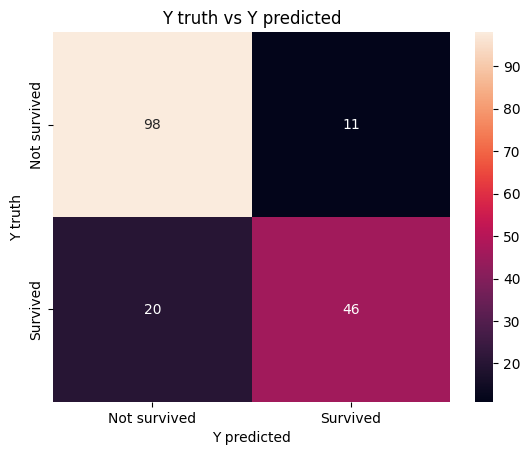

In [128]:
# plotting confusion matrix in heatmap
cm = confusion_matrix(y_test , y_pred)
plt.title('Y truth vs Y predicted')
ax = sns.heatmap(cm ,annot=True)
plt.xlabel('Y predicted')
plt.ylabel('Y truth')
ax.set_xticklabels(['Not survived' , 'Survived'])
ax.set_yticklabels(['Not survived' , 'Survived'])

In [123]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S
0,3,-0.584430,1,0,-0.310164,0.292641,0.316422,0.146343,0.000000,0.141080,0,0,1,0,1
1,1,0.643003,1,0,2.446672,0.377331,0.315796,0.805228,0.377331,0.607499,0,0,0,1,0
2,3,-0.277572,0,0,-0.281103,0.299576,0.324915,0.697310,0.378766,0.474557,0,0,0,0,1
3,1,0.412859,1,0,1.663824,0.000000,0.324915,0.779460,0.000000,0.385045,0,0,0,0,1
4,3,0.412859,0,0,-0.275721,0.292641,0.316422,0.146343,0.377331,0.380491,0,0,1,0,1


In [124]:
predict_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S
871,892,3,0.374502,0,0,-0.285227,0.296728,0.319367,0.147362,0.688103,0.378669,0,0,1,0,0
872,893,3,1.333434,1,0,-0.320927,0.296728,0.319367,0.784506,0.377727,0.378669,0,0,0,0,1
873,894,2,2.484152,0,0,-0.205221,0.296728,0.319367,0.147362,0.377727,0.378669,0,0,1,0,0
874,895,3,-0.200857,0,0,-0.249351,0.296728,0.319367,0.147362,0.377727,0.378669,0,0,1,0,1
875,896,3,-0.584430,1,1,-0.093283,0.296728,0.319367,0.784506,1.000000,0.378669,0,1,0,0,1


In [125]:
# Predicting predict data


predict_df['Survived_pred_logit'] = logit.predict(predict_df.drop('PassengerId' , axis=1))

In [126]:
# Saving the model to combine it with the oher models
import joblib

model_filename = r'E:\Data science\Titanic dataset\Models\LogisticRegression.pkl'

joblib.dump(logit , model_filename)

"""Model saved successfully"""

'Model saved successfully'

In [127]:
# save the dataset
train_logistic_df = x.reset_index(drop=True)
train_logistic_df['Survived'] = y
train_logistic_df.to_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\training_data.csv' , 
                         index=False)

predict_df.to_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\predicting_data.csv',
                  index=False)